In [2]:
import sys
sys.path.append('..')
import tangles
import cost_functions
import cut_finding
import importlib
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
import sklearn.metrics
import pandas as pd

import numpy as np
from collections import Counter

import sklearn.metrics
import tqdm
from sklearn.cluster import KMeans
import importlib
import time
import cut_finding
import plotting
import dataset_generation
from functools import partial
import seaborn as sns

def reload():
    importlib.reload(tangles)
    importlib.reload(cost_functions)
    importlib.reload(cut_finding)
    importlib.reload(tangles)
    importlib.reload(plotting)
    importlib.reload(dataset_generation)


In [4]:
dimensions = 2
data_size = 8000
min_distance = 3


391539


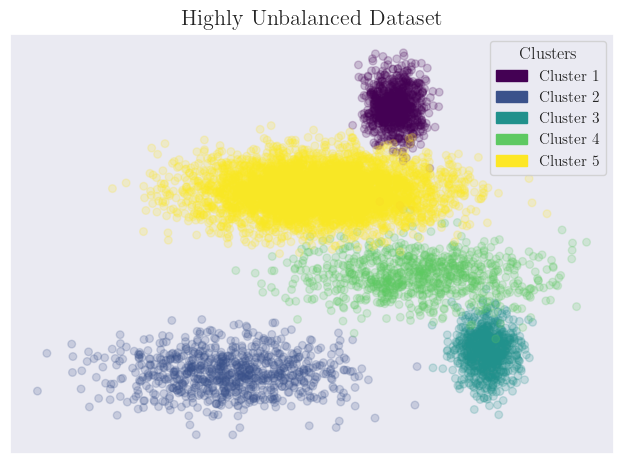

In [349]:
n_clusters = 5

seed = np.random.randint(0, 1000000)
print(seed)
seed = 237665
np.random.seed(seed)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Generate data
data, labels = dataset_generation.create_2d_test_data(
    n_clusters=n_clusters,
    dimensions=dimensions,
    scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
    weights=np.array([0.1, 0.1, 0.1, 0.1, 0.6]),
    num_samples=data_size,
    min_distance=min_distance
)

# Define colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (n_clusters - 1)) for i in range(n_clusters)]

# Create scatter plot
scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30, alpha=0.2)

# Create legend
legend_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {i+1}') for i in range(n_clusters)]
plt.legend(handles=legend_patches, title="Clusters", loc="best")

# Format plot
plt.xticks([])
plt.yticks([])
plt.title('Highly Unbalanced Dataset', fontsize=16)
plt.tight_layout()

# Save plot
plt.savefig('plots/agreement_sensitivity/unbalanced_dataset.png')


100%|██████████| 639/639 [00:19<00:00, 32.92it/s]


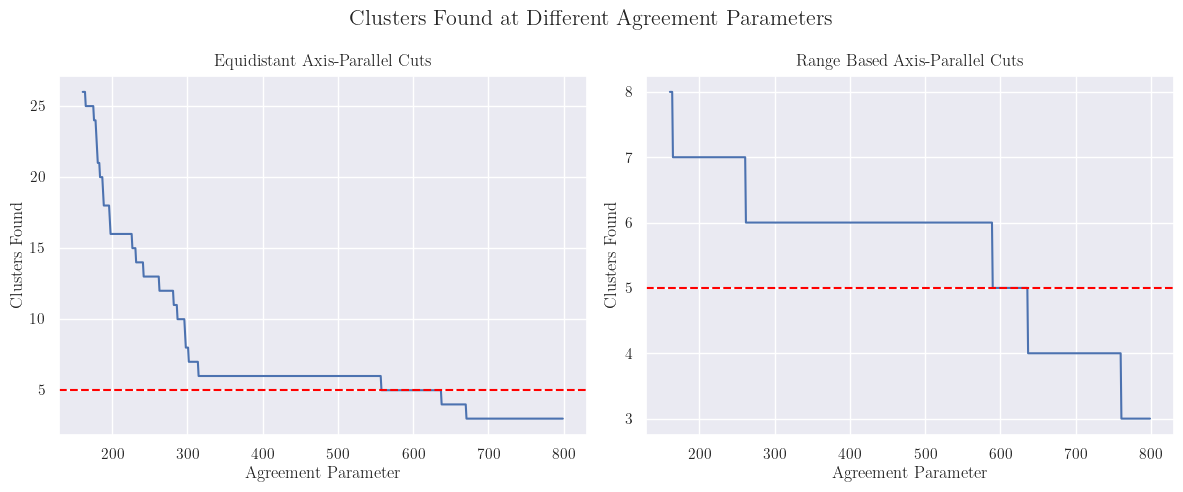

In [277]:
NMI = sklearn.metrics.normalized_mutual_info_score
from collections import defaultdict

reload()

agreements = list(range(161, 800, 1))

clusters_found_by_k = defaultdict(list)

n_clusters = 5

k = 50

def compute(Model, k, subplot):
    clusters_found = []
    for agreement in tqdm.tqdm(agreements):
        preds = Model(agreement_param=agreement).fit_predict(data)
        clusters_found_ = len(np.unique(preds))
        clusters_found.append(clusters_found_)

    plt.subplot(1, 2, subplot)
    plt.plot(agreements, clusters_found)
    plt.axhline(n_clusters, color='red', linestyle='--')
    plt.ylabel('Clusters Found')
    plt.xlabel('Agreement Parameter')
    if subplot == 1:
        plt.title("Equidistant Axis-Parallel Cuts")
    else:
        plt.title("Range Based Axis-Parallel Cuts")

    # plt.title(f'Clusters found  {clusters_found.count(n_clusters)} ')

    return clusters_found

cost_class = cost_functions.BorderDistances

plt.figure(figsize=(12, 5))

for i, Model in enumerate([
    partial(tangles.TangleClustering, cut_function=partial(cut_finding.axis_parallel_cuts, k=50), cost_class=cost_class),
    partial(tangles.TangleClustering, cut_function=partial(cut_finding.range_axis_parallel, agreement_param=160), cost_class=cost_class),
]):
    compute(Model, k, i + 1)

plt.suptitle('Clusters Found at Different Agreement Parameters', fontsize=16)

plt.tight_layout()
plt.savefig('plots/agreement_sensitivity/equidistant_vs_range.png')



100%|██████████| 639/639 [00:36<00:00, 17.31it/s]


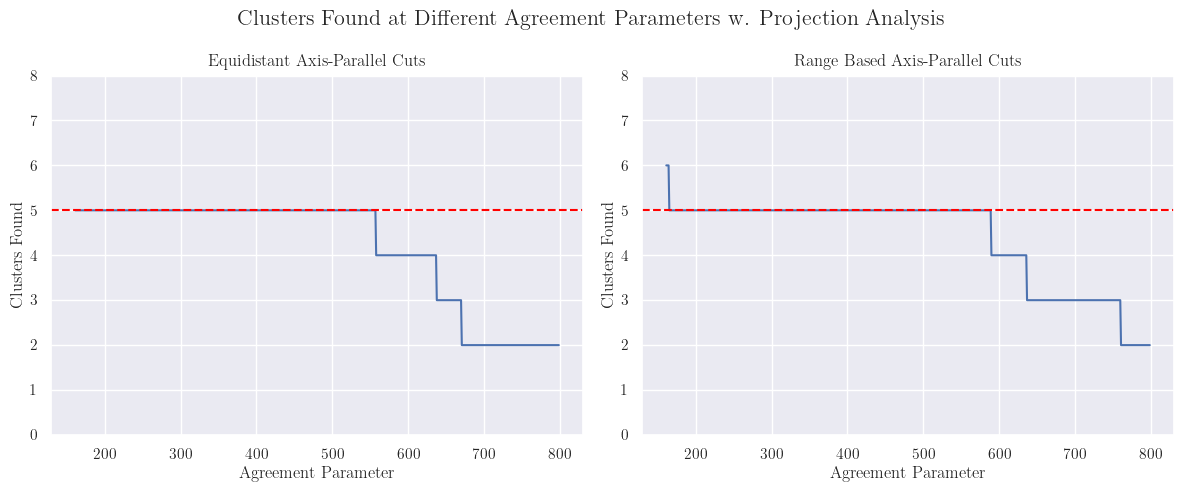

In [279]:
plt.figure(figsize=(12, 5))

for i, Model in enumerate([
    partial(tangles.TangleClustering, cut_function=partial(cut_finding.axis_parallel_cuts, k=50), cost_class=cost_class, prune_from_projection=True),
    partial(tangles.TangleClustering, cut_function=partial(cut_finding.range_axis_parallel, agreement_param=160), cost_class=cost_class, prune_from_projection=True),
]):
    compute(Model, k, i + 1)
    plt.ylim(0, 8)

plt.suptitle('Clusters Found at Different Agreement Parameters w. Projection Analysis', fontsize=16)

plt.tight_layout()
plt.savefig('plots/agreement_sensitivity/equidistant_vs_range_projection.png')


100%|██████████| 640/640 [00:35<00:00, 17.88it/s]

Text(0.5, 0, 'Agreement Parameter')

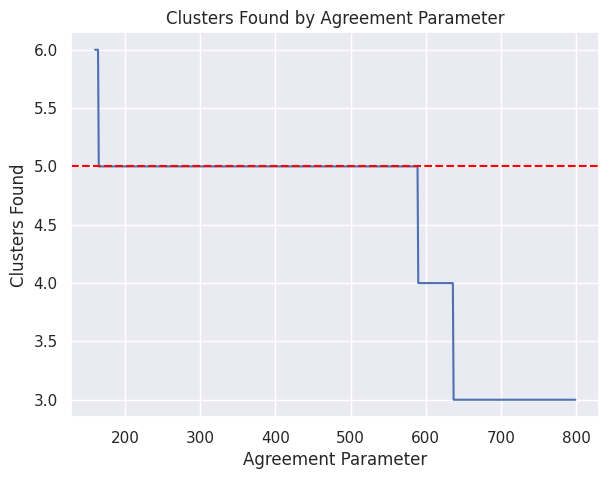

In [82]:
NMI = sklearn.metrics.normalized_mutual_info_score
from collections import defaultdict

reload()

agreements = list(range(160, 800, 1))

clusters_found_by_k = defaultdict(list)

n_clusters = 5

k = 50

def compute(Model, k, subplot):
    clusters_found = []
    for agreement in tqdm.tqdm(agreements):
        # cut_func = partial(cut_finding.range_axis_parallel, agreement_param=min(160))
        preds = Model(agreement_param=agreement).fit_predict(data)
        clusters_found_ = len(np.unique(preds))
        clusters_found.append(clusters_found_)

    plt.subplot(1, 2, subplot)
    plt.plot(agreements, clusters_found)
    plt.axhline(n_clusters, color='red', linestyle='--')

    plt.title(f'Clusters found  {clusters_found.count(n_clusters)} ')
    # plt.yticks([4, 5, 6])

    return clusters_found

cost_class = cost_functions.BorderDistances

plt.figure(figsize=(15, 5))

for i, Model in enumerate([
    # partial(tangles.TangleClustering, cut_function=partial(cut_finding.axis_parallel_cuts, k=50), cost_class=cost_class,),
    partial(tangles.TangleClustering, cut_function=partial(cut_finding.range_axis_parallel, agreement_param=160), prune_from_projection=True, cost_class=cost_class),
]):

    compute(Model, k, i + 1)

# Axis parallel success. 558 - 637
# By count success . 590 - 690
plt.ylabel('Clusters Found')
plt.title('Clusters Found by Agreement Parameter')

plt.xlabel('Agreement Parameter')

100%|██████████| 128/128 [00:04<00:00, 28.04it/s]


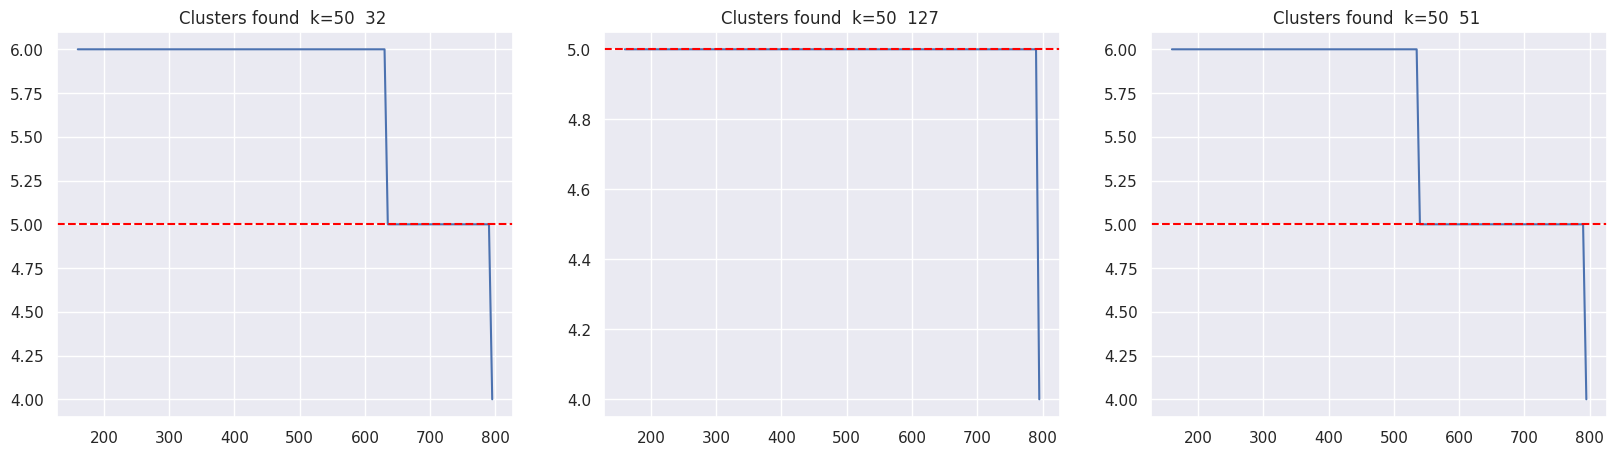

In [35]:
NMI = sklearn.metrics.normalized_mutual_info_score
from collections import defaultdict

reload()

agreements = list(range(160, 800, 5))

clusters_found_by_k = defaultdict(list)

n_clusters = 5
k = 50

def compute(Model, k, subplot):
    clusters_found = []
    for agreement in tqdm.tqdm(agreements):
        cut_func = partial(cut_finding.range_axis_parallel, agreement_param=min(agreement, 160))
        preds = Model(agreement_param=agreement, cut_function=cut_func).fit_predict(data)
        clusters_found_ = len(np.unique(preds))
        clusters_found.append(clusters_found_)

    plt.subplot(1, 3, subplot)
    plt.plot(agreements, clusters_found)
    plt.axhline(n_clusters, color='red', linestyle='--')
    plt.title(f'Clusters found  k={k}  {clusters_found.count(n_clusters)} ')

    return clusters_found

cost_class = cost_functions.BorderDistances

plt.figure(figsize=(20, 5))

for i, Model in enumerate([
    partial(tangles.TangleClustering, cost_class=cost_class),
    partial(tangles.TangleClustering, cost_class=cost_class, prune_from_projection=True),
    partial(tangles.TangleClustering, cost_class=cost_class, prune_depth=1),
]):
    compute(Model, k, i + 1)

plt.show()


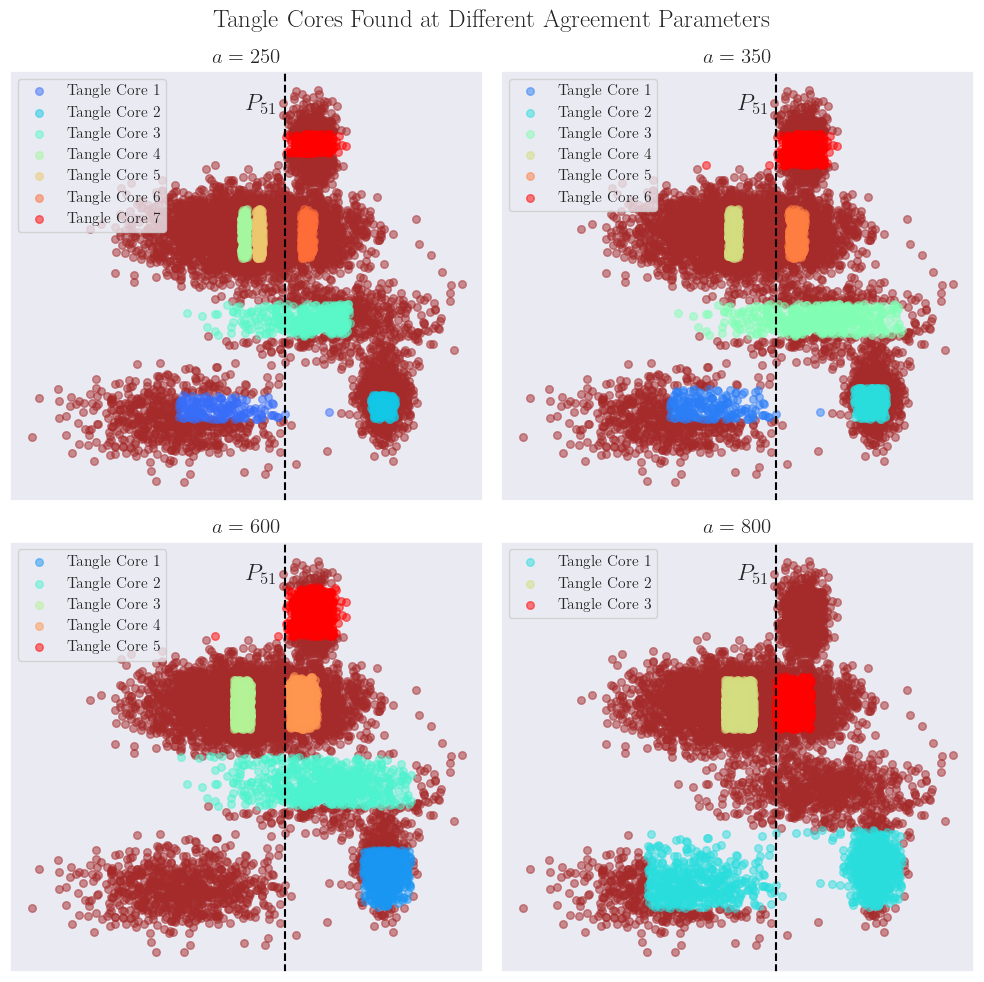

In [353]:
reload()
cut_func = partial(cut_finding.range_axis_parallel, agreement_param=160)
cost_class = cost_functions.BorderDistances
Tangles_ = partial(tangles.TangleClustering,
                   cut_function=cut_func,
                   cost_class=cost_class)

plt.rc('text', usetex=True)

plt.figure(figsize=(10, 10))

for i, agreement in enumerate([250, 350, 600, 800]):
    plt.subplot(2, 2, i + 1)
    model = Tangles_(agreement_param=agreement)

    preds = model.fit_predict(data)
    model.plot_tangles(data, title="Agreement Param {}".format(agreement))
    plt.title("$a = {}$".format(agreement), fontsize=15)
    plt.axvline(0.589505535134699, color='black', linestyle='--')
    plt.text(0.5, 0.95, '$P_{51}$', fontsize=17)
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Tangle Cores Found at Different Agreement Parameters',
             fontsize=18)
plt.tight_layout()
plt.savefig('plots/agreement_sensitivity/tangle_cores_issue.png', dpi=300, bbox_inches='tight')
plt.show()

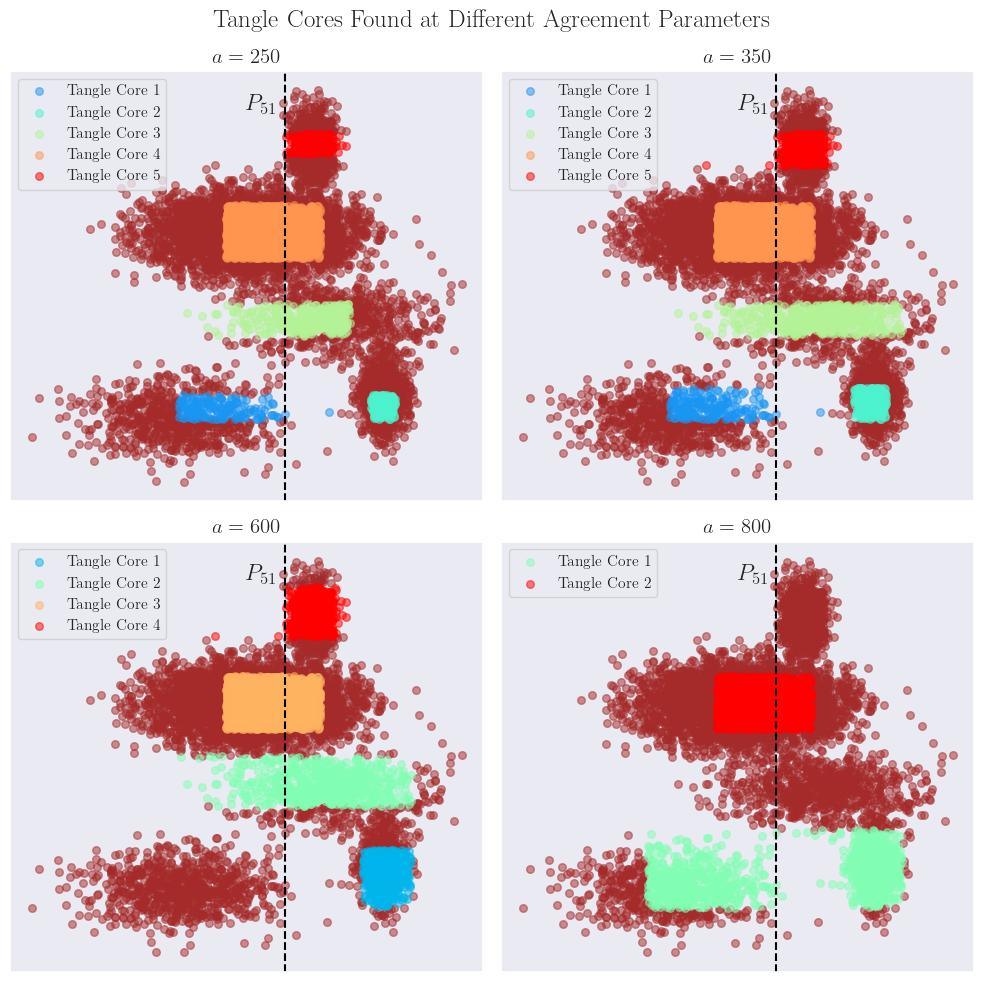

In [354]:
reload()
cut_func = partial(cut_finding.range_axis_parallel, agreement_param=160)
cost_class = cost_functions.BorderDistances
Tangles_ = partial(tangles.TangleClustering,
                   cut_function=cut_func,
                   prune_from_projection=True,
                   cost_class=cost_class)

plt.rc('text', usetex=True)

plt.figure(figsize=(10, 10))

for i, agreement in enumerate([250, 350, 600, 800]):
    plt.subplot(2, 2, i + 1)
    model = Tangles_(agreement_param=agreement)

    preds = model.fit_predict(data)
    model.plot_tangles(data, title="Agreement Param {}".format(agreement))
    plt.title("$a = {}$".format(agreement), fontsize=15)
    plt.axvline(0.589505535134699, color='black', linestyle='--')
    plt.text(0.5, 0.95, '$P_{51}$', fontsize=17)
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Tangle Cores Found at Different Agreement Parameters',
             fontsize=18)
plt.tight_layout()
plt.savefig('plots/agreement_sensitivity/tangle_cores_issue_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

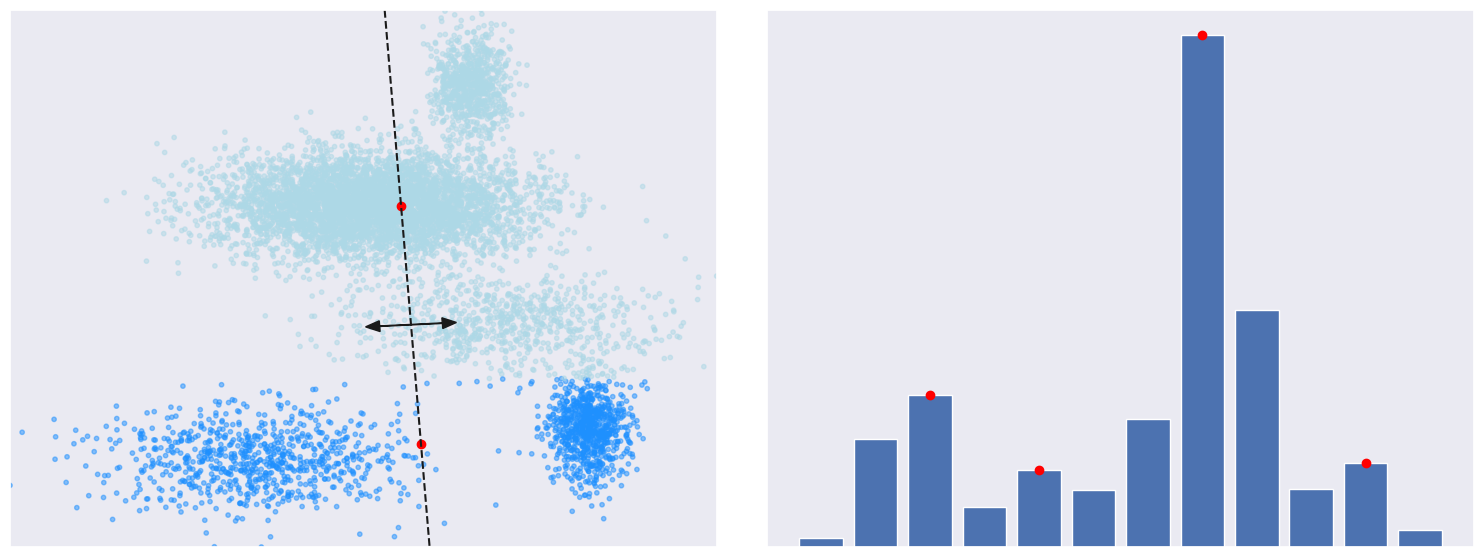

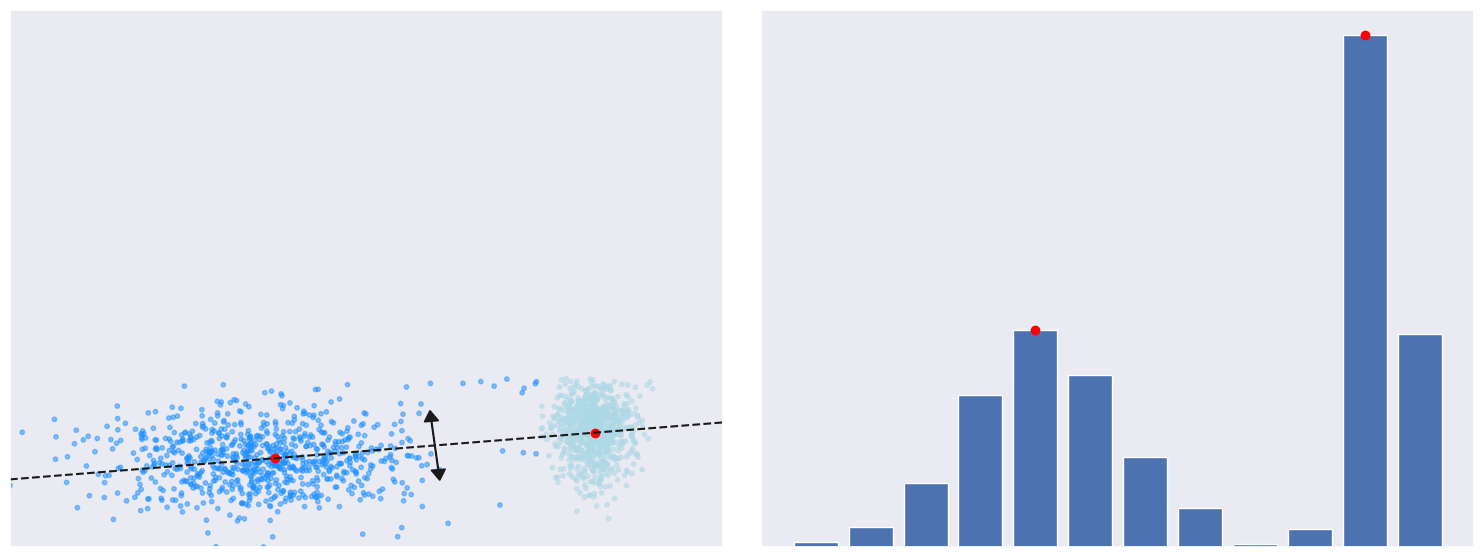

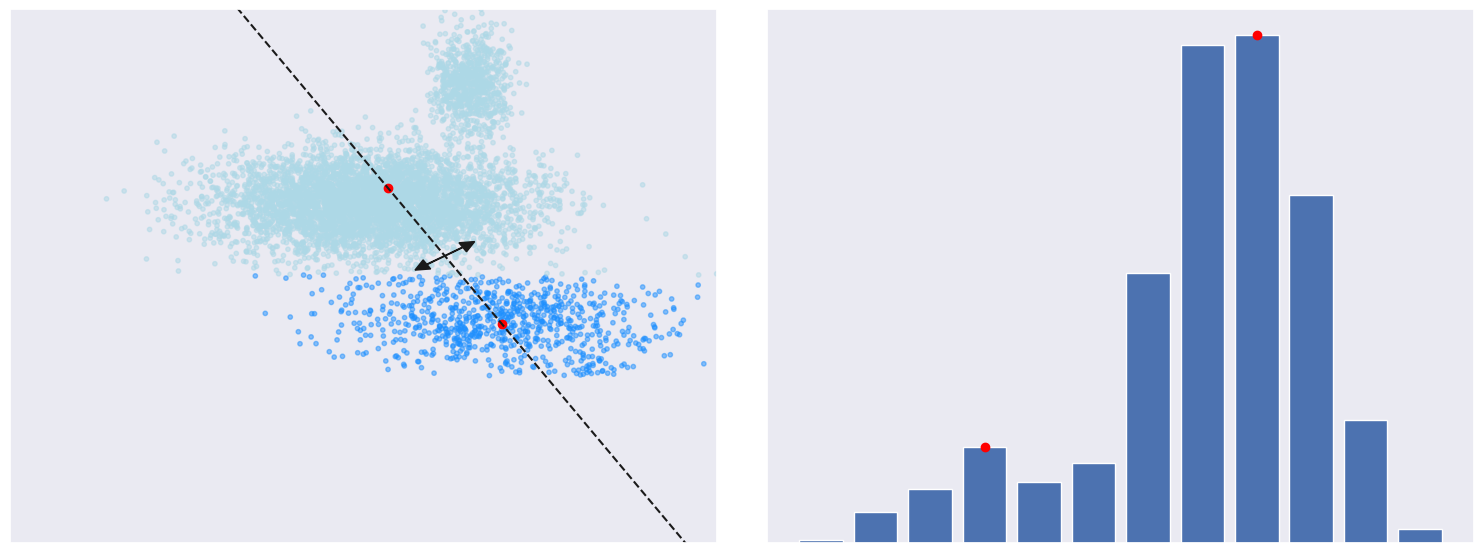

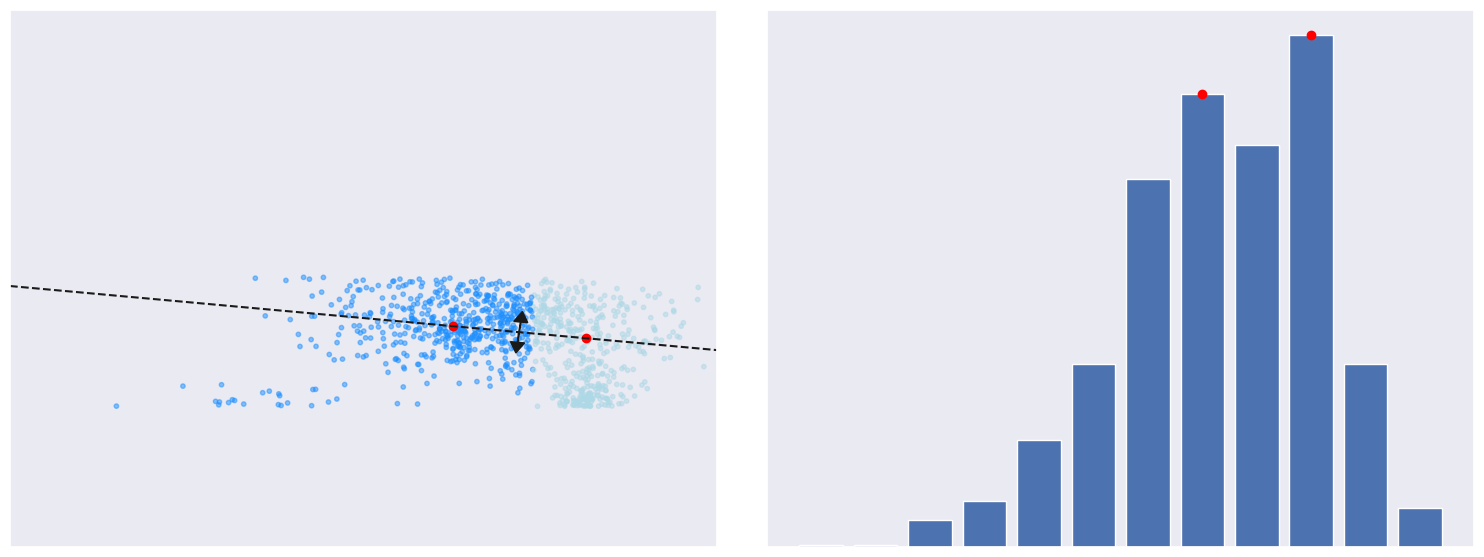

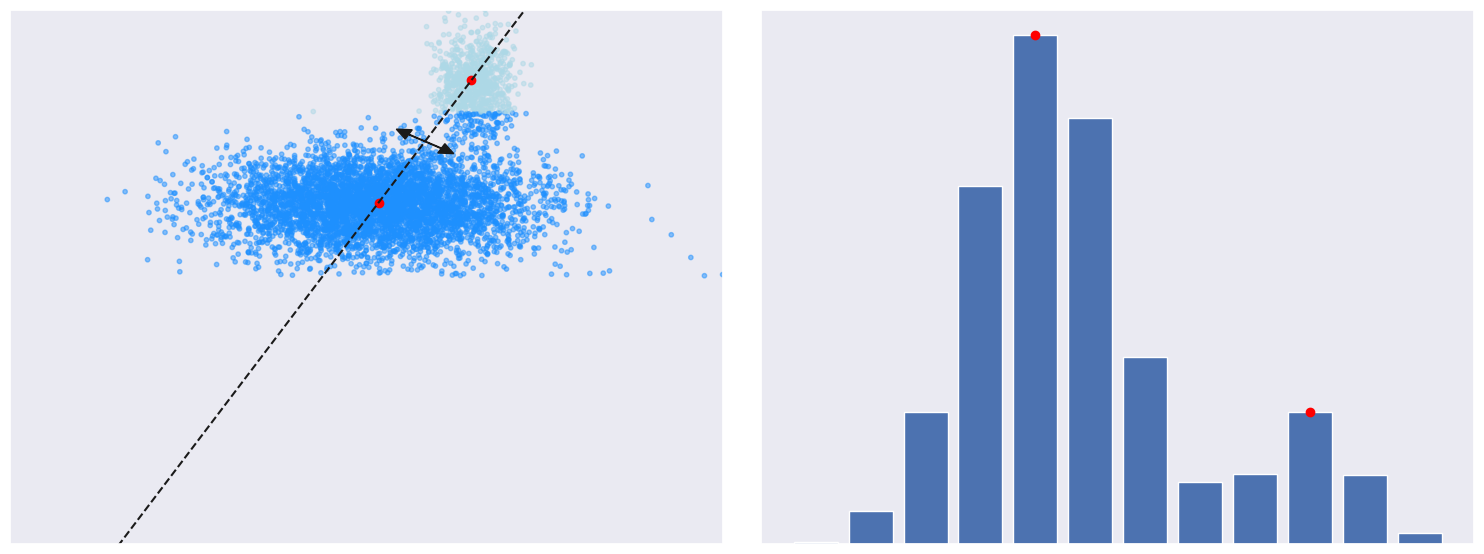

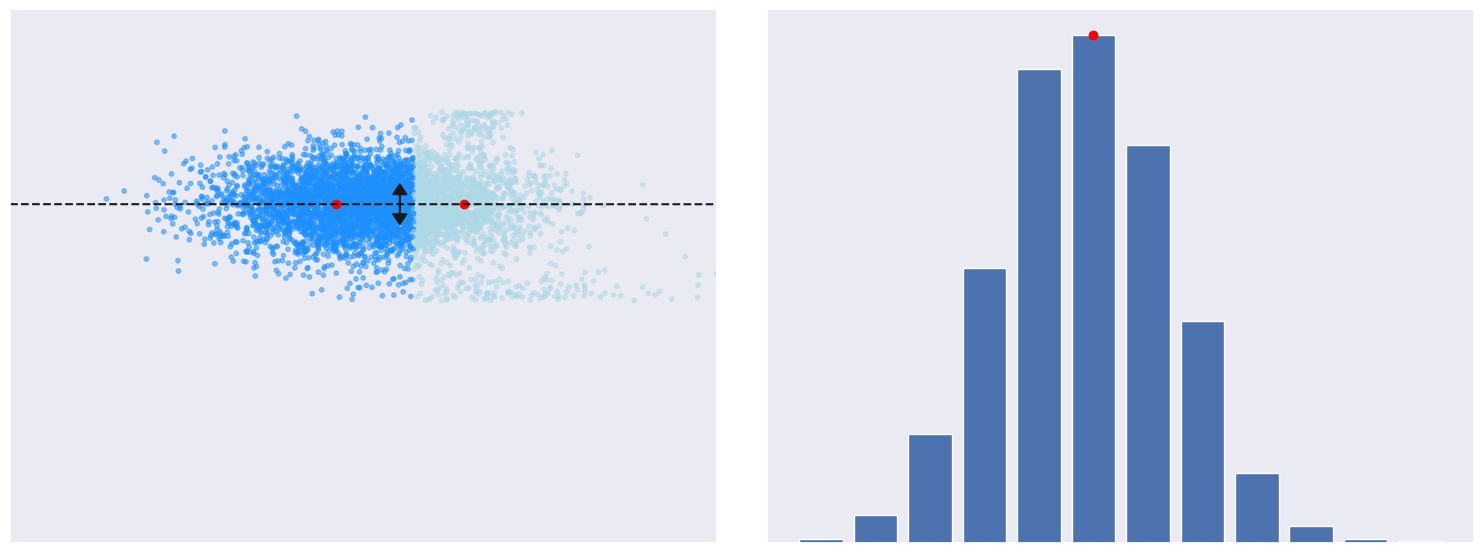

NMI 0.8843493133259547

      _____1 - 550.0911733333135___________
     /                                     \
   _12_                                _____-4____
  /    \                              /           \
-31    -31                          _12_          _-5_
                                   /    \        /    \
                                 -16    -15    -51    -17

KMeans NMI 0.7118444488608634


/home/oscar/git/Thesis/my_implementation/experiments/../tangles.py:590: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  self.compute_tangles()


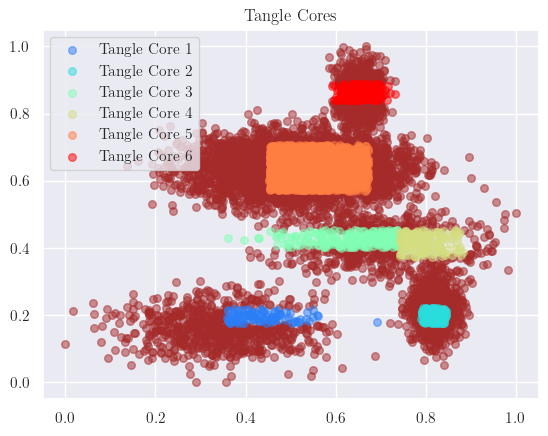

In [281]:
cut_func = partial(cut_finding.range_axis_parallel, agreement_param=160)
reload()

model = tangles.TangleClustering(agreement_param=161,
                   cut_function=cut_func,
                   cost_class=cost_functions.BorderDistances,
                   prune_from_projection=True,
                   plot_hist=True)

preds = model.fit_predict(data)

nmi = NMI(labels, preds)
print('NMI', nmi)

print(model.root)

model.plot_tangles(data)

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
kmeans_preds = kmeans.predict(data)

kmeans_nmi = NMI(labels, kmeans_preds)
print('KMeans NMI', kmeans_nmi)


Text(0.51, 0.95, '$P_{51}$')

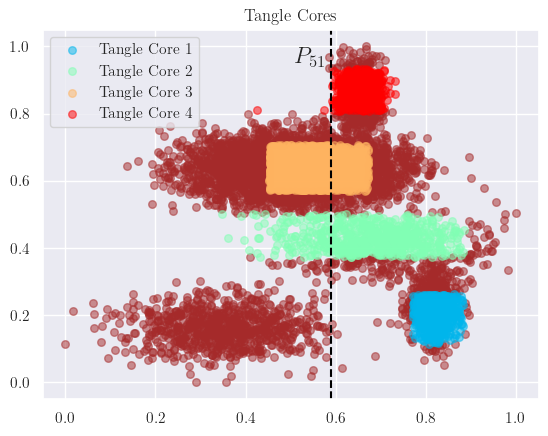

In [265]:
reload()
plt.rc('text', usetex=True)

model.plot_tangles(data)
plt.axvline(0.589505535134699, color='black', linestyle='--')
plt.text(0.51, 0.95, '$P_{51}$', fontsize=17)

# print(model.root)


In [329]:
runs = 100

results = []
data_size = 8000
cut_func = partial(cut_finding.range_axis_parallel, agreement_param=data_size / 100)
costClass = cost_functions.BorderDistances
min_distance = 4

for n_clusters in [5]:
    for data_size in [data_size]:
        for i in tqdm.tqdm(range(runs)):
            seed = np.random.randint(0, 1000000)
            np.random.seed(seed)

            data_unbalanced, labels_unbalanced = dataset_generation.create_2d_test_data(
                n_clusters=n_clusters,
                dimensions=dimensions,
                scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
                weights=np.array([0.1, 0.1, 0.1, 0.1, 0.6]),
                num_samples=data_size,
                min_distance=min_distance
            )
            np.random.seed(seed)

            data_balanced, labels_balanced = dataset_generation.create_2d_test_data(
                n_clusters=n_clusters,
                dimensions=dimensions,
                scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
                weights=np.array([0.2, 0.2, 0.2, 0.2, 0.2]),
                num_samples=data_size,
                min_distance=min_distance
            )

            MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
            data_balanced = MinMaxScaler.fit_transform(data_balanced)
            MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
            data_unbalanced = MinMaxScaler.fit_transform(data_unbalanced)

            agreement_param_balanced = (min(Counter(labels_balanced).values()) * (
                0.2))
            agreement_param_unbalanced = (min(Counter(labels_unbalanced).values()) * (
                0.2))

            models = {
                "Vanilla (Balanced Data)": partial(tangles.TangleClustering,
                                            cost_class=cost_class,
                                            cut_function=cut_func,
                                            agreement_param=agreement_param_balanced
                                            ),
                "Projection Analysis (Balanced Data)": partial(tangles.TangleClustering,
                                            cost_class=cost_class,
                                            cut_function=cut_func,
                                            agreement_param=agreement_param_balanced,
                                            prune_from_projection=True
                                            ),
                "Vanilla (Unbalanced Data)": partial(tangles.TangleClustering,
                                            cost_class=cost_class,
                                            cut_function=cut_func,
                                            agreement_param=agreement_param_unbalanced,
                                            ),
                "Projection Analysis (Unbalanced Data)": partial(tangles.TangleClustering,
                                            cost_class=cost_class,
                                            cut_function=cut_func,
                                            agreement_param=agreement_param_unbalanced,
                                            prune_from_projection=True
                                            ),
            }

            for model_name, Model in models.items():
                if "Balanced" in model_name:
                    starttime = time.time()
                    model = Model(n_clusters=n_clusters)
                    preds = model.fit_predict(data_balanced)
                    nmi = sklearn.metrics.normalized_mutual_info_score(
                        labels_balanced, preds)
                    time_ = time.time() - starttime
                else:
                    starttime = time.time()
                    model = Model(n_clusters=n_clusters)
                    preds = model.fit_predict(data_unbalanced)
                    nmi = sklearn.metrics.normalized_mutual_info_score(
                        labels_unbalanced, preds)
                    time_ = time.time() - starttime

                clusters_found = len(np.unique(preds))
                results.append([
                    model_name,  n_clusters, data_size, nmi, time_, clusters_found])


100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


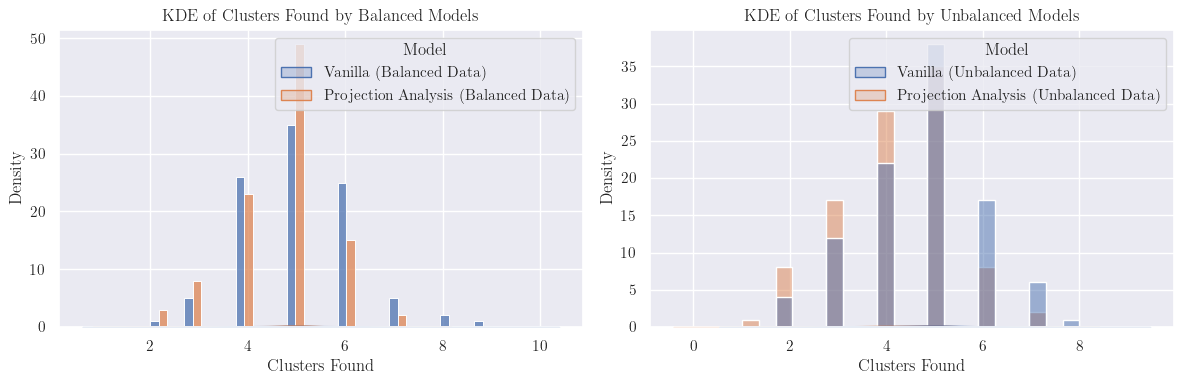

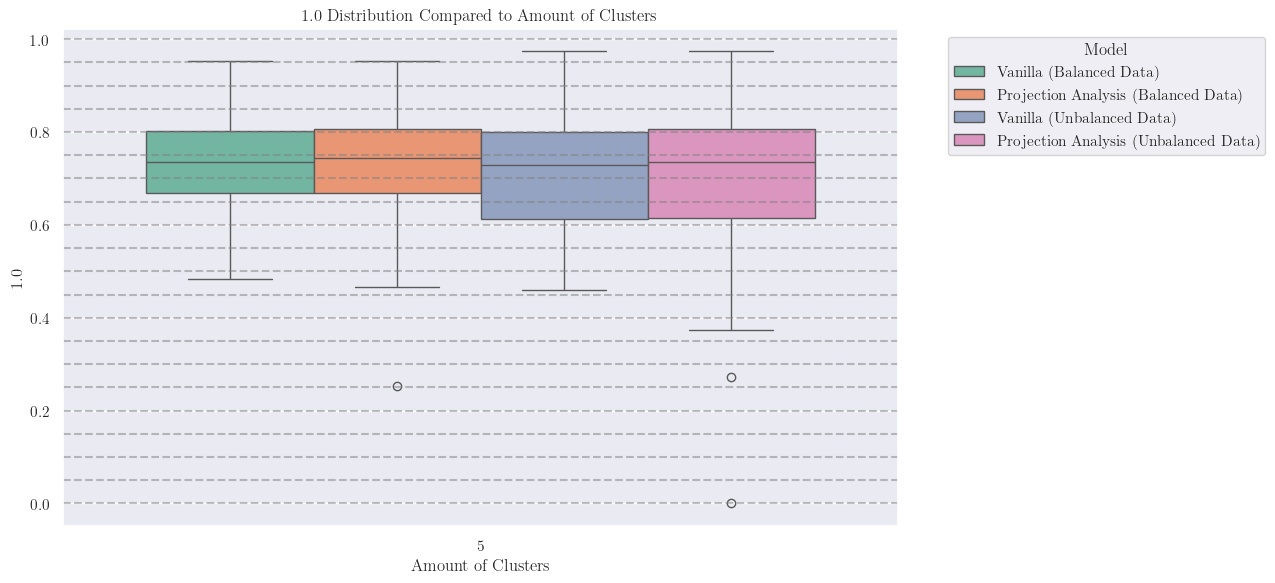

In [333]:
reload()
df = pd.DataFrame(results, columns=["Model", "Amount of Clusters", "Data-Size",
                                    "NMI", "Time", "Clusters Found"])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df[df["Model"].str.contains("Balanced")], x="Clusters Found", hue="Model" , bins=20, multiple='dodge')
plt.title('Histogram of Clusters Found by Balanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df["Model"].str.contains("Unbalanced")], x="Clusters Found", hue="Model", bins=20)
plt.title('Histogram of Clusters Found by Unbalanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Count')

plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df["Model"].str.contains("Balanced")], x="Clusters Found", hue="Model", fill=True)
plt.title('KDE of Clusters Found by Balanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df["Model"].str.contains("Unbalanced")], x="Clusters Found", hue="Model", fill=True)
plt.title('KDE of Clusters Found by Unbalanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

plotting.BoxPlot(df).nmi(x="Amount of Clusters")

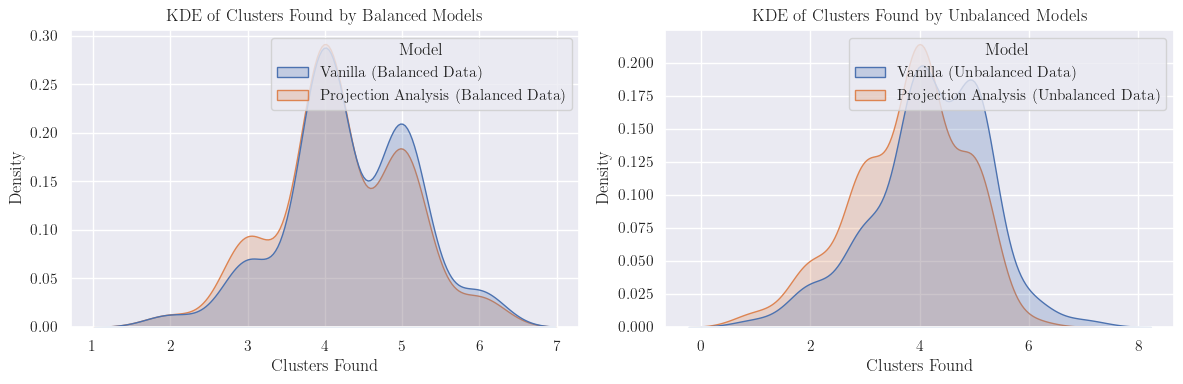

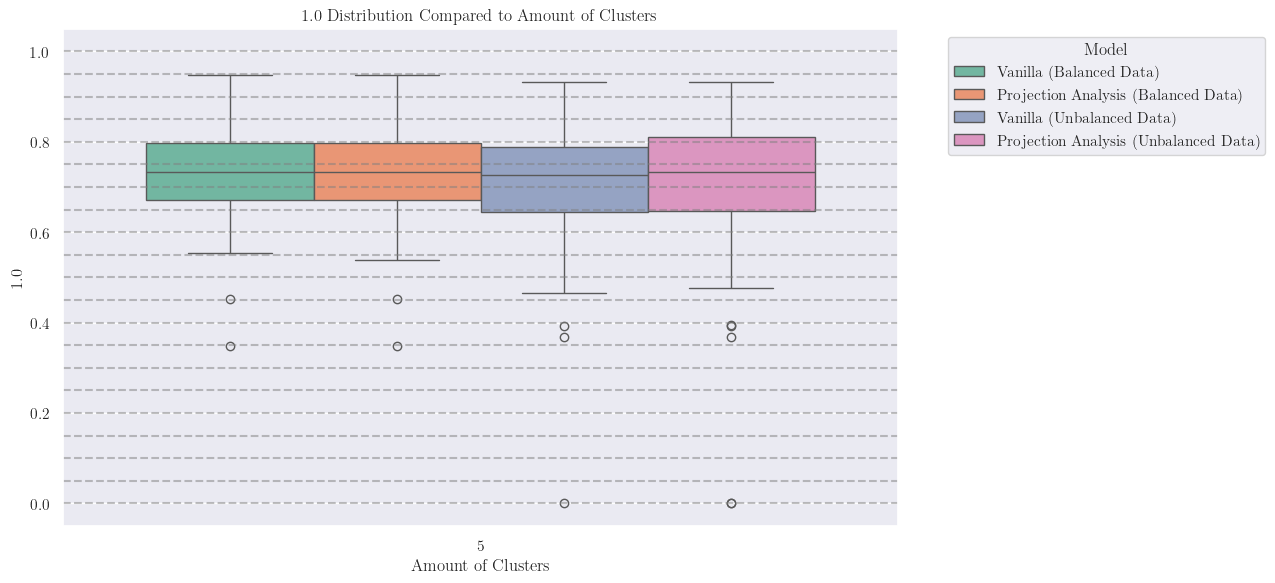

In [328]:
reload()
df = pd.DataFrame(results, columns=["Model", "Amount of Clusters", "Data-Size",
                                    "NMI", "Time", "Clusters Found"])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df[df["Model"].str.contains("Balanced")], x="Clusters Found", hue="Model", multiple="stack", bins=20)
plt.title('Histogram of Clusters Found by Balanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df["Model"].str.contains("Unbalanced")], x="Clusters Found", hue="Model", multiple="stack", bins=20)
plt.title('Histogram of Clusters Found by Unbalanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Count')

plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df["Model"].str.contains("Balanced")], x="Clusters Found", hue="Model", fill=True)
plt.title('KDE of Clusters Found by Balanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df["Model"].str.contains("Unbalanced")], x="Clusters Found", hue="Model", fill=True)
plt.title('KDE of Clusters Found by Unbalanced Models')
plt.xlabel('Clusters Found')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

plotting.BoxPlot(df).nmi(x="Amount of Clusters")

In [24]:
runs = 100

results = []
data_size = 8000
cut_func = partial(cut_finding.range_axis_parallel, agreement_param=data_size / 100)
cost_class = cost_functions.BorderDistances
min_distance = 4

for n_clusters in [5]:
    for data_size in [data_size]:
        for i in range(4, 19):
            agreement_frac = i/20
            print(agreement_frac)
            for i in tqdm.tqdm(range(runs)):
                seed = np.random.randint(0, 1000000)
                np.random.seed(seed)

                data_unbalanced, labels_unbalanced = dataset_generation.create_2d_test_data(
                    n_clusters=n_clusters,
                    dimensions=dimensions,
                    scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
                    weights=np.array([0.1, 0.1, 0.1, 0.1, 0.6]),
                    num_samples=data_size,
                    min_distance=min_distance
                )
                np.random.seed(seed)

                data_balanced, labels_balanced = dataset_generation.create_2d_test_data(
                    n_clusters=n_clusters,
                    dimensions=dimensions,
                    scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
                    weights=np.array([0.2, 0.2, 0.2, 0.2, 0.2]),
                    num_samples=data_size,
                    min_distance=min_distance
                )

                MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
                data_balanced = MinMaxScaler.fit_transform(data_balanced)
                MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
                data_unbalanced = MinMaxScaler.fit_transform(data_unbalanced)

                agreement_param_balanced = (min(Counter(labels_balanced).values()) * (
                    agreement_frac))
                agreement_param_unbalanced = (min(Counter(labels_unbalanced).values()) * (
                    agreement_frac))

                models = {
                    "Vanilla (Balanced Data)": partial(tangles.TangleClustering,
                                                cost_class=cost_class,
                                                cut_function=cut_func,
                                                agreement_param=agreement_param_balanced
                                                ),
                    "Projection Analysis (Balanced Data)": partial(tangles.TangleClustering,
                                                cost_class=cost_class,
                                                cut_function=cut_func,
                                                agreement_param=agreement_param_balanced,
                                                prune_from_projection=True
                                                ),
                    "Vanilla (Unbalanced Data)": partial(tangles.TangleClustering,
                                                cost_class=cost_class,
                                                cut_function=cut_func,
                                                agreement_param=agreement_param_unbalanced,
                                                ),
                    "Projection Analysis (Unbalanced Data)": partial(tangles.TangleClustering,
                                                cost_class=cost_class,
                                                cut_function=cut_func,
                                                agreement_param=agreement_param_unbalanced,
                                                prune_from_projection=True
                                                ),
                }

                for model_name, Model in models.items():
                    if "Balanced" in model_name:
                        starttime = time.time()
                        model = Model(n_clusters=n_clusters)
                        preds = model.fit_predict(data_balanced)
                        nmi = sklearn.metrics.normalized_mutual_info_score(
                            labels_balanced, preds)
                        time_ = time.time() - starttime
                    else:
                        starttime = time.time()
                        model = Model(n_clusters=n_clusters)
                        preds = model.fit_predict(data_unbalanced)
                        nmi = sklearn.metrics.normalized_mutual_info_score(
                            labels_unbalanced, preds)
                        time_ = time.time() - starttime

                    clusters_found = len(np.unique(preds))
                    results.append([
                        model_name,  n_clusters, data_size, nmi, time_, clusters_found, str(agreement_frac)])


0.2


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


0.25


100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


0.3


100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


0.35


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


0.4


100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


0.45


100%|██████████| 100/100 [00:38<00:00,  2.60it/s]


0.5


100%|██████████| 100/100 [00:37<00:00,  2.69it/s]


0.55


100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


0.6


100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


0.65


100%|██████████| 100/100 [00:36<00:00,  2.76it/s]


0.7


100%|██████████| 100/100 [00:37<00:00,  2.63it/s]


0.75


100%|██████████| 100/100 [00:35<00:00,  2.86it/s]


0.8


100%|██████████| 100/100 [00:34<00:00,  2.93it/s]


0.85


100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


0.9


100%|██████████| 100/100 [00:32<00:00,  3.10it/s]


In [27]:
df2 = pd.DataFrame(results, columns=["Model", "Clusters", "Data-Size",
                                    "NMI", "Time", "Clusters-Found", "Agreement"])

print(df2[(df2["Model"] == "Vanilla (Unbalanced Data)") & (df2["Agreement"].astype(float) <= 0.5 ) ]["Clusters-Found"].mean())



3.933333333333333


0       0.2
1       0.2
2       0.2
3       0.2
4       0.2
       ... 
5995    0.9
5996    0.9
5997    0.9
5998    0.9
5999    0.9
Name: Agreement, Length: 6000, dtype: float64

In [28]:
df2

,Model,Clusters,Data-Size,NMI,Time,Clusters-Found,Agreement
0,Vanilla (Balanced Data),5,8000,0.796013,0.176508,6,0.2
1,Projection Analysis (Balanced Data),5,8000,0.796013,0.109458,6,0.2
2,Vanilla (Unbalanced Data),5,8000,0.872130,0.109260,6,0.2
3,Projection Analysis (Unbalanced Data),5,8000,0.872130,0.078739,6,0.2
4,Vanilla (Balanced Data),5,8000,0.900577,0.091542,6,0.2
...,...,...,...,...,...,...,...
5995,Projection Analysis (Unbalanced Data),5,8000,0.742686,0.065273,3,0.9
5996,Vanilla (Balanced Data),5,8000,0.688401,0.058198,3,0.9
5997,Projection Analysis (Balanced Data),5,8000,0.688401,0.048324,3,0.9
5998,Vanilla (Unbalanced Data),5,8000,0.774081,0.076889,4,0.9


3.933333333333333


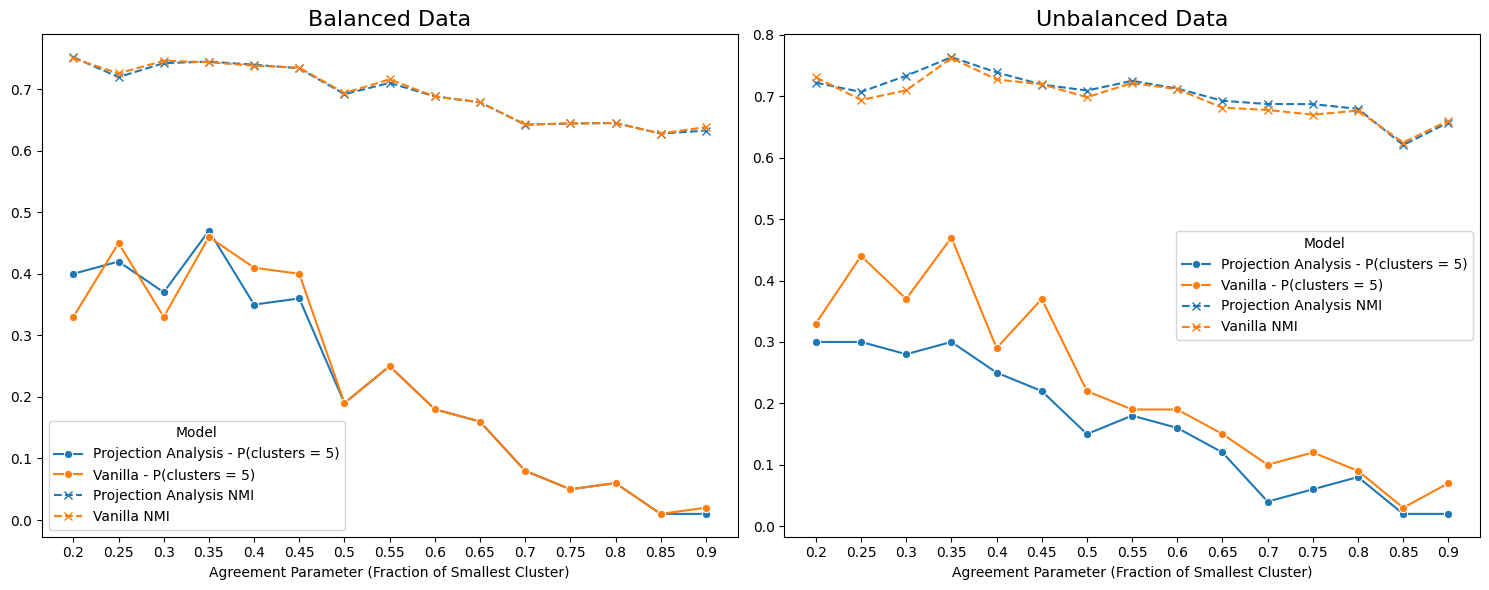

In [29]:
df2 = pd.DataFrame(results, columns=["Model", "Clusters", "Data-Size",
                                    "NMI", "Time", "Clusters-Found", "Agreement"])

print(df2[df2["Model"] == "Vanilla (Unbalanced Data)"]["Clusters-Found"].mean())

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

df_balanced = df2[df2['Model'].str.contains('Balanced')].copy()
df_balanced["Model"] = df_balanced["Model"].replace("Vanilla (Balanced Data)", "Vanilla - P(clusters = 5)")

df_balanced["Model"] = df_balanced["Model"].replace("Projection Analysis (Balanced Data)",
                                                    "Projection Analysis - P(clusters = 5)")

prob_5_clusters = df_balanced[df_balanced['Clusters-Found'] == 5].groupby(
    ['Model', 'Agreement']).size() / df_balanced.groupby(['Model', 'Agreement']).size()
prob_5_clusters = prob_5_clusters.reset_index(name='Probability')

avg_nmi = df_balanced.groupby(['Model', 'Agreement'])['NMI'].median().reset_index()

prob_5_clusters = prob_5_clusters.merge(avg_nmi, on=['Model', 'Agreement'])

# plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=prob_5_clusters, x='Agreement', y='Probability', hue='Model', marker='o')

legend = ax.get_legend()
legend_labels = [text.get_text() for text in legend.get_texts()]

for i, model in enumerate(prob_5_clusters['Model'].unique()):
    model_data = prob_5_clusters[prob_5_clusters['Model'] == model]
    plt.plot(model_data['Agreement'], model_data['NMI'], marker='x', linestyle='--',
             label=f"{model.split('- P')[0]}NMI", color='#1f77b4' if i == 0 else '#ff7f0e')

plt.title('Balanced Data', fontsize=16)
plt.xlabel('Agreement Parameter (Fraction of Smallest Cluster)')
plt.ylabel('')
plt.legend(title='Model')

plt.subplot(1, 2, 2)


df_unbalanced = df2[df2['Model'].str.contains('Unbalanced')].copy()
df_unbalanced["Model"] = df_unbalanced["Model"].replace("Vanilla (Unbalanced Data)", "Vanilla - P(clusters = 5)")

df_unbalanced["Model"] = df_unbalanced["Model"].replace("Projection Analysis (Unbalanced Data)",
                                                    "Projection Analysis - P(clusters = 5)")

prob_5_clusters = df_unbalanced[df_unbalanced['Clusters-Found'] == 5].groupby(
    ['Model', 'Agreement']).size() / df_unbalanced.groupby(['Model', 'Agreement']).size()
prob_5_clusters = prob_5_clusters.reset_index(name='Probability')

avg_nmi = df_unbalanced.groupby(['Model', 'Agreement'])['NMI'].median().reset_index()

prob_5_clusters = prob_5_clusters.merge(avg_nmi, on=['Model', 'Agreement'])

ax = sns.lineplot(data=prob_5_clusters, x='Agreement', y='Probability', hue='Model', marker='o')

legend = ax.get_legend()
legend_labels = [text.get_text() for text in legend.get_texts()]

for i, model in enumerate(prob_5_clusters['Model'].unique()):
    model_data = prob_5_clusters[prob_5_clusters['Model'] == model]
    plt.plot(model_data['Agreement'], model_data['NMI'], marker='x', linestyle='--',
             label=f"{model.split('- P')[0]}NMI", color='#1f77b4' if i == 0 else '#ff7f0e')

plt.title('Unbalanced Data', fontsize=16)
plt.xlabel('Agreement Parameter (Fraction of Smallest Cluster)')
plt.ylabel('')
plt.legend(title='Model')

plt.tight_layout()
plt.savefig('plots/agreement_sensitivity/projection_vs_agreement.png', dpi=300, bbox_inches='tight')
plt.show()
# plt.show()

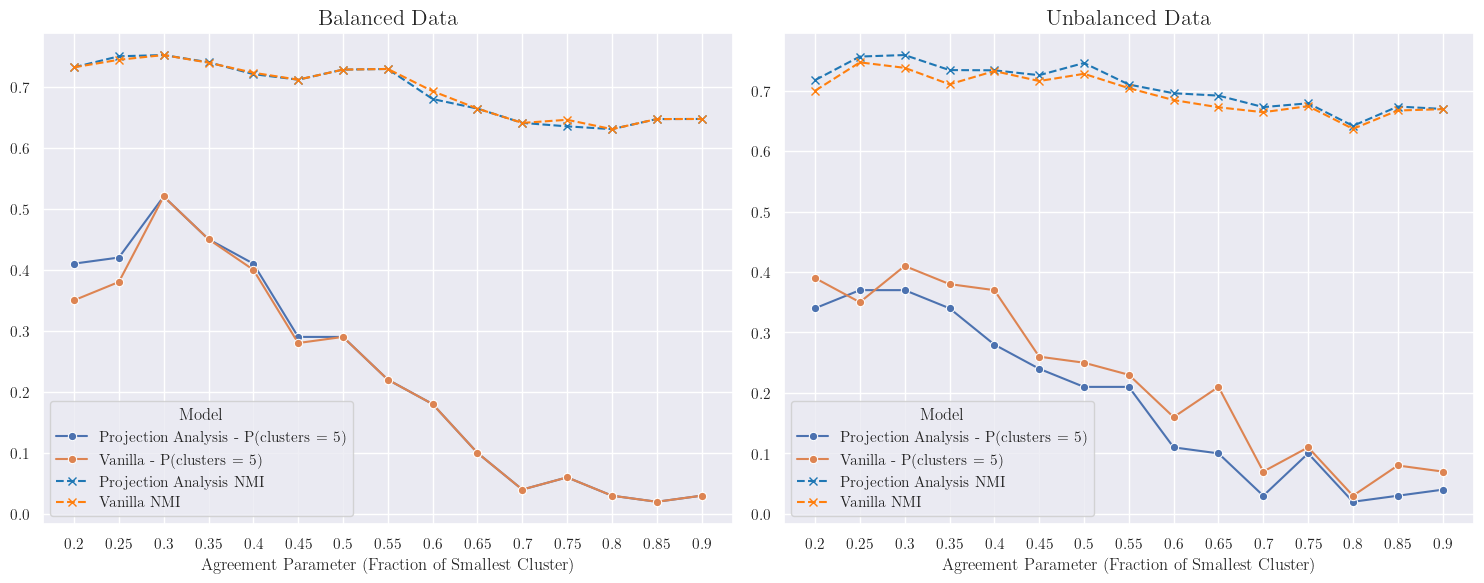

In [348]:
df2 = pd.DataFrame(results, columns=["Model", "Clusters", "Data-Size",
                                    "NMI", "Time", "Clusters-Found", "Agreement"])

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

df_balanced = df2[df2['Model'].str.contains('Balanced')].copy()
df_balanced["Model"] = df_balanced["Model"].replace("Vanilla (Balanced Data)", "Vanilla - P(clusters = 5)")

df_balanced["Model"] = df_balanced["Model"].replace("Projection Analysis (Balanced Data)",
                                                    "Projection Analysis - P(clusters = 5)")

prob_5_clusters = df_balanced[df_balanced['Clusters-Found'] == 5].groupby(
    ['Model', 'Agreement']).size() / df_balanced.groupby(['Model', 'Agreement']).size()
prob_5_clusters = prob_5_clusters.reset_index(name='Probability')

avg_nmi = df_balanced.groupby(['Model', 'Agreement'])['NMI'].median().reset_index()

prob_5_clusters = prob_5_clusters.merge(avg_nmi, on=['Model', 'Agreement'])

# plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=prob_5_clusters, x='Agreement', y='Probability', hue='Model', marker='o')

legend = ax.get_legend()
legend_labels = [text.get_text() for text in legend.get_texts()]

for i, model in enumerate(prob_5_clusters['Model'].unique()):
    model_data = prob_5_clusters[prob_5_clusters['Model'] == model]
    plt.plot(model_data['Agreement'], model_data['NMI'], marker='x', linestyle='--',
             label=f"{model.split('- P')[0]}NMI", color='#1f77b4' if i == 0 else '#ff7f0e')

plt.title('Balanced Data', fontsize=16)
plt.xlabel('Agreement Parameter (Fraction of Smallest Cluster)')
plt.ylabel('')
plt.legend(title='Model')

plt.subplot(1, 2, 2)


df_unbalanced = df2[df2['Model'].str.contains('Unbalanced')].copy()
df_unbalanced["Model"] = df_unbalanced["Model"].replace("Vanilla (Unbalanced Data)", "Vanilla - P(clusters = 5)")

df_unbalanced["Model"] = df_unbalanced["Model"].replace("Projection Analysis (Unbalanced Data)",
                                                    "Projection Analysis - P(clusters = 5)")

prob_5_clusters = df_unbalanced[df_unbalanced['Clusters-Found'] == 5].groupby(
    ['Model', 'Agreement']).size() / df_unbalanced.groupby(['Model', 'Agreement']).size()
prob_5_clusters = prob_5_clusters.reset_index(name='Probability')

avg_nmi = df_unbalanced.groupby(['Model', 'Agreement'])['NMI'].median().reset_index()

prob_5_clusters = prob_5_clusters.merge(avg_nmi, on=['Model', 'Agreement'])

ax = sns.lineplot(data=prob_5_clusters, x='Agreement', y='Probability', hue='Model', marker='o')

legend = ax.get_legend()
legend_labels = [text.get_text() for text in legend.get_texts()]

for i, model in enumerate(prob_5_clusters['Model'].unique()):
    model_data = prob_5_clusters[prob_5_clusters['Model'] == model]
    plt.plot(model_data['Agreement'], model_data['NMI'], marker='x', linestyle='--',
             label=f"{model.split('- P')[0]}NMI", color='#1f77b4' if i == 0 else '#ff7f0e')

plt.title('Unbalanced Data', fontsize=16)
plt.xlabel('Agreement Parameter (Fraction of Smallest Cluster)')
plt.ylabel('')
plt.legend(title='Model')

plt.tight_layout()
plt.savefig('plots/agreement_sensitivity/projection_vs_agreement.png', dpi=300, bbox_inches='tight')
plt.show()
# plt.show()

In [22]:
runs = 100

results = []
data_size = 16000
cut_func = partial(cut_finding.range_axis_parallel, agreement_param=319)
costClass = cost_functions.BorderDistances
min_distance = 4


cases_found = 0
runs = 0
while True:
    agreement_frac = 5/20

    seed = np.random.randint(0, 1000000)
    np.random.seed(seed)

    data_unbalanced, labels_unbalanced = dataset_generation.create_2d_test_data(
        n_clusters=n_clusters,
        dimensions=dimensions,
        scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
        weights=np.array([0.1, 0.1, 0.1, 0.1, 0.6]),
        num_samples=data_size,
        min_distance=min_distance
    )

    np.random.seed(seed)

    MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
    data_unbalanced = MinMaxScaler.fit_transform(data_unbalanced)

    agreement_param_unbalanced = (min(Counter(labels_unbalanced).values()) * (
        agreement_frac))

    models = {
        "Vanilla (Unbalanced Data)": partial(tangles.TangleClustering,
                                    cost_class=costClass,
                                    cut_function=cut_func,
                                    agreement_param=agreement_param_unbalanced,
                                    ),
        "Projection Analysis (Unbalanced Data)": partial(tangles.TangleClustering,
                                    cost_class=costClass,
                                    cut_function=cut_func,
                                    agreement_param=agreement_param_unbalanced,
                                    prune_from_projection=True
                                    ),
    }

    model1 = models["Vanilla (Unbalanced Data)"](n_clusters=n_clusters)
    preds1 = model1.fit_predict(data_unbalanced)
    nmi1 = sklearn.metrics.normalized_mutual_info_score(
        labels_unbalanced, preds1)
    clusters_found = len(np.unique(preds1))


    runs += 1
    if clusters_found > 5:
        cases_found += 1
        if cases_found % 10 == 0:
            print(cases_found)
        results.append([
            "Vanilla (Unbalanced Data)",  n_clusters, data_size, nmi1, time_, clusters_found, str(agreement_frac)])
        model2 = models["Projection Analysis (Unbalanced Data)"](n_clusters=n_clusters)
        preds2 = model2.fit_predict(data_unbalanced)
        nmi2 = sklearn.metrics.normalized_mutual_info_score(
            labels_unbalanced, preds2)

        time_ = time.time() - starttime

        clusters_found = len(np.unique(preds2))

        results.append([
            "Projection Analysis (Unbalanced Data)",  n_clusters, data_size, nmi2, time_, clusters_found, str(agreement_frac)])

    if cases_found == 100:
        break

10
20
30
40
50
60
70
80
90
100


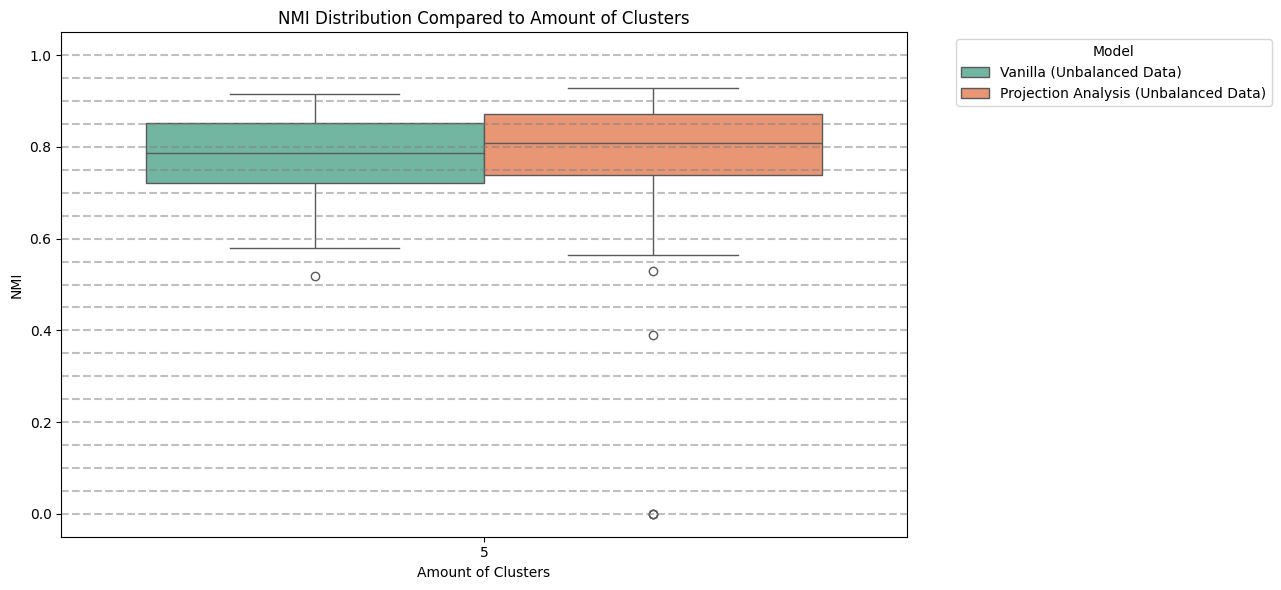

In [23]:
df = pd.DataFrame(results, columns=["Model", "Amount of Clusters", "Data-Size",
                                    "NMI", "Time", "Clusters Found", "Agreement"])

plotting.BoxPlot(df).nmi(x="Amount of Clusters")